In [1]:
#importing libraries and visualisation tools
# Data Manipulation
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Plotting graphs
import matplotlib.pyplot as plt

# Machine learning libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Statistic descriptives 
from scipy.stats import skew
from scipy.stats import kurtosis

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [2]:
#Ford dataset
ford = pd.read_csv(r"C:\Users\Mr Mathonsi MM\Documents\Honours\Project\Data\FORD.csv")


In [3]:
# Predictor variables for  Ford dataset
ford['Open-Close']= ford.Open - ford.Close
ford['High-Low']  = ford.High - ford.Low
ford = ford.dropna()
X= ford[['Open-Close', 'High-Low']]

# Target variable For the Mastercard 
Y = np.where(ford['Adj Close'].shift(-1)>ford['Adj Close'],1,-1)

#Viewing the first five rows of the Predictor variables
X.head()

Open-Close  High-Low
0       -0.01      0.19
1       -0.03      0.11
2        0.02      0.02
3        0.00      0.03
4       -0.05      0.11

In [4]:
Y = (Y- min(Y))/(max(Y)- min(Y))

#X_ford = (X_ford- min(X_ford))/(max(X_ford)- min(X_ford))

In [5]:
# Splitting the dataset Into training and tests dataset for Ford
split_percentage = 0.2
split = int(split_percentage*len(ford))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

In [6]:
#Fitting the algorithm and evaluating it
# Instantiate KNN learning model(k=5)
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model
knn.fit(X_train, Y_train)

# Accuracy Score
accuracy_train = accuracy_score(Y_train, knn.predict(X_train))*100.0
accuracy_test = accuracy_score(Y_test, knn.predict(X_test))*100.0

print ('Train_data Accuracy for Ford dataset: %.2f' %accuracy_train)
print ('Test_data Accuracy for Ford dataset: %.2f' %accuracy_test)

Train_data Accuracy for Ford dataset: 70.53
Test_data Accuracy for Ford dataset: 55.34


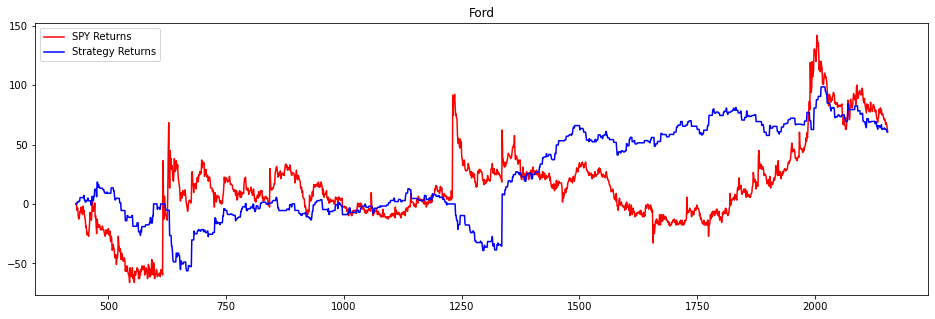

In [7]:
# Predicted Signal
ford['Predicted_Signal'] = knn.predict(X)

# SPY Cumulative Returns
ford['SPY_returns'] = np.log(ford['Adj Close']/ford['Adj Close'].shift(1))
Cumulative_SPY_returns = (ford[split:]['SPY_returns'].cumsum()*100)  

# Cumulative Strategy Returns 
ford['Startegy_returns'] = ford['SPY_returns']* ford['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = ( ford[split:]['Startegy_returns'].cumsum()*100) 

# Plot the results to visualize the performance
#lot for Ford dataset
##t.subplot(2,2,2)
plt.figure(figsize=(16,5))
plt.plot(Cumulative_SPY_returns, color='r',label = 'SPY Returns')
plt.plot(Cumulative_Strategy_returns, color='b', label = 'Strategy Returns')
plt.legend()
plt.title('Ford')
plt.savefig('knnford.jpg')
plt.show()


In [8]:
# Calculate Sharpe ratio
Std = Cumulative_Strategy_returns.std()
Sharpe = (Cumulative_Strategy_returns-Cumulative_SPY_returns)/Std
Sharpe = Sharpe.mean()
print('Sharpe ratio: %.2f'%Sharpe )

Sharpe ratio: 0.27


In [9]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [10]:
# Features construction 
ford['Open-Close'] = (ford.Open - ford.Close)/ford.Open
ford['High-Low'] = (ford.High - ford.Low)/ford.Low
ford['percent_change'] = ford['Adj Close'].pct_change()
ford['std_5'] = ford['percent_change'].rolling(5).std()
ford['ret_5'] = ford['percent_change'].rolling(5).mean()
ford.dropna(inplace=True)

# X is the input variable
X = ford[['Open-Close', 'High-Low', 'std_5', 'ret_5']]

# Y is the target or output variable
y = np.where(ford['Adj Close'].shift(-1) > ford['Adj Close'], 1, -1)

In [11]:
# Total dataset length
dataset_length = ford.shape[0]

# Training dataset length
split = int(dataset_length * 0.2)
split

430

In [12]:
# Splitiing the X and y into train and test datasets
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Print the size of the train and test dataset
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(430, 4) (1720, 4)
(430,) (1720,)


In [13]:
clf = RandomForestClassifier(random_state=100)
# Create the model on train dataset
model = clf.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
print('Correct Prediction (%): ', accuracy_score(y_test, model.predict(X_test), normalize=True)*100.0)

Correct Prediction (%):  57.674418604651166


In [14]:
# Run the code to view the classification report metrics
from sklearn.metrics import classification_report
report = classification_report(y_test, model.predict(X_test))
print(report)

              precision    recall  f1-score   support

          -1       0.61      0.72      0.66       994
           1       0.50      0.38      0.43       726

    accuracy                           0.58      1720
   macro avg       0.56      0.55      0.55      1720
weighted avg       0.56      0.58      0.56      1720



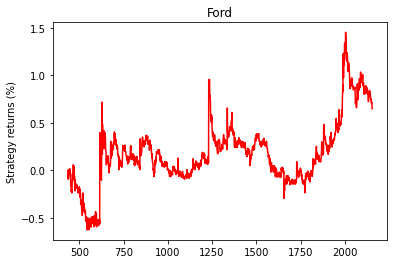

In [15]:
# SPY Cumulative Returns
ford['SPY_returns'] = np.log(ford['Adj Close']/ford['Adj Close'].shift(1))
Cumulative_SPY_returns = ford[split:]['SPY_returns'].cumsum()


ford['strategy_returns'] = ford.percent_change.shift(-1) * model.predict(X)
#(ford.strategy_returns[split:]).cumprod().plot()
plt.plot(Cumulative_SPY_returns, color='r',label = 'SPY Returns')
plt.ylabel('Strategy returns (%)')
plt.title('Ford')
plt.savefig('rfford.jpg')
plt.show()
